In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pickle

In [3]:
data = pd.read_csv('cement_strength_08012020_120021.csv')

In [4]:
data

,Cement _component_1,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
data.describe()

,Cement _component_1,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
data.isnull().sum()

Cement _component_1                0
Blast Furnace Slag _component_2    0
Fly Ash _component_3               0
Water_component_4                  0
Superplasticizer_component_5       0
Coarse Aggregate_component_6       0
Fine Aggregate_component_7         0
Age_day                            0
Concrete_compressive _strength     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cement _component_1              1030 non-null   float64
 1   Blast Furnace Slag _component_2  1030 non-null   float64
 2   Fly Ash _component_3             1030 non-null   float64
 3   Water_component_4                1030 non-null   float64
 4   Superplasticizer_component_5     1030 non-null   float64
 5   Coarse Aggregate_component_6     1030 non-null   float64
 6   Fine Aggregate_component_7       1030 non-null   float64
 7   Age_day                          1030 non-null   int64  
 8   Concrete_compressive _strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
data.columns

Index(['Cement _component_1', 'Blast Furnace Slag _component_2',
       'Fly Ash _component_3', 'Water_component_4',
       'Superplasticizer_component_5', 'Coarse Aggregate_component_6',
       'Fine Aggregate_component_7', 'Age_day',
       'Concrete_compressive _strength'],
      dtype='object')

In [9]:
x = data.drop(labels = ['Concrete_compressive _strength'], axis=1)

In [10]:
y = data['Concrete_compressive _strength']

C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

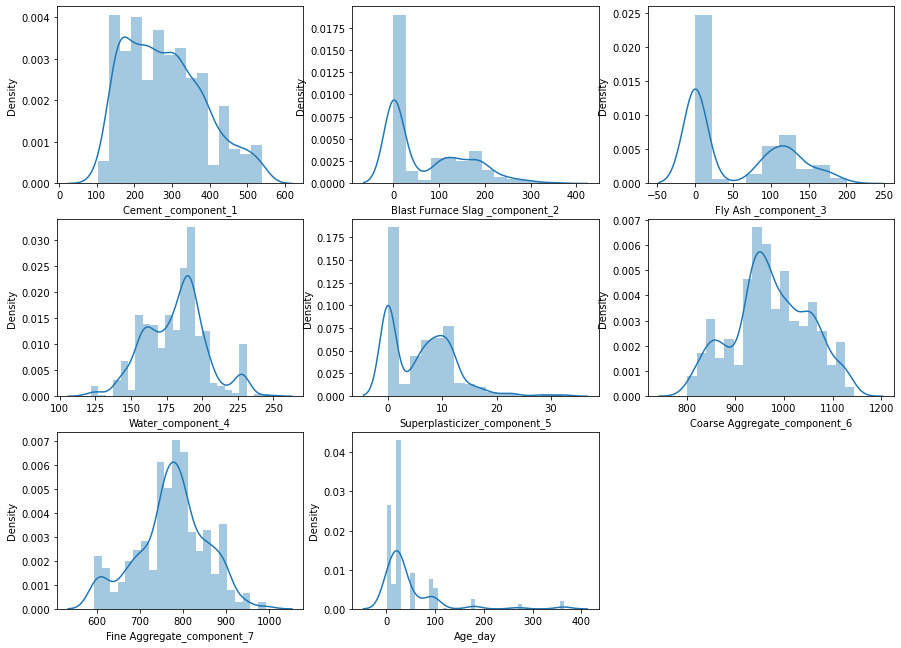

In [11]:
plt.figure(figsize=(15,15), facecolor = 'white')
plotnumber = 1

for column in x.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(x[column])
    plt.xlabel(column, fontsize=10)
    plotnumber +=1
    
plt.show()

In [12]:
for column in x.columns:
    x[column] += 1
    x[column] = np.log(x[column])
    

C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

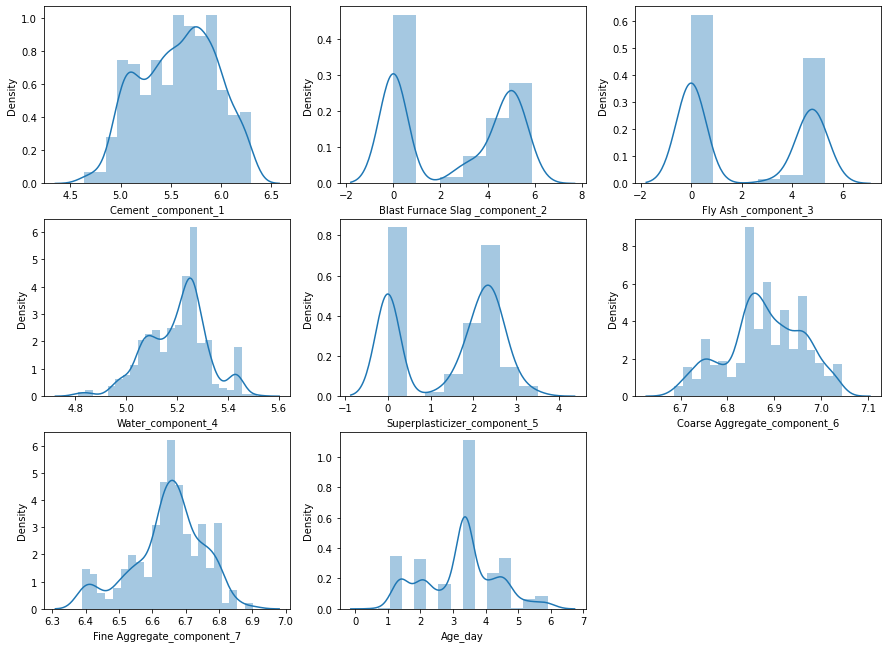

In [13]:
plt.figure(figsize=(15,15), facecolor = 'white')
plotnumber = 1

for column in x.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(x[column])
    plt.xlabel(column, fontsize=10)
    plotnumber +=1
    
plt.show()

C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhishek\anac

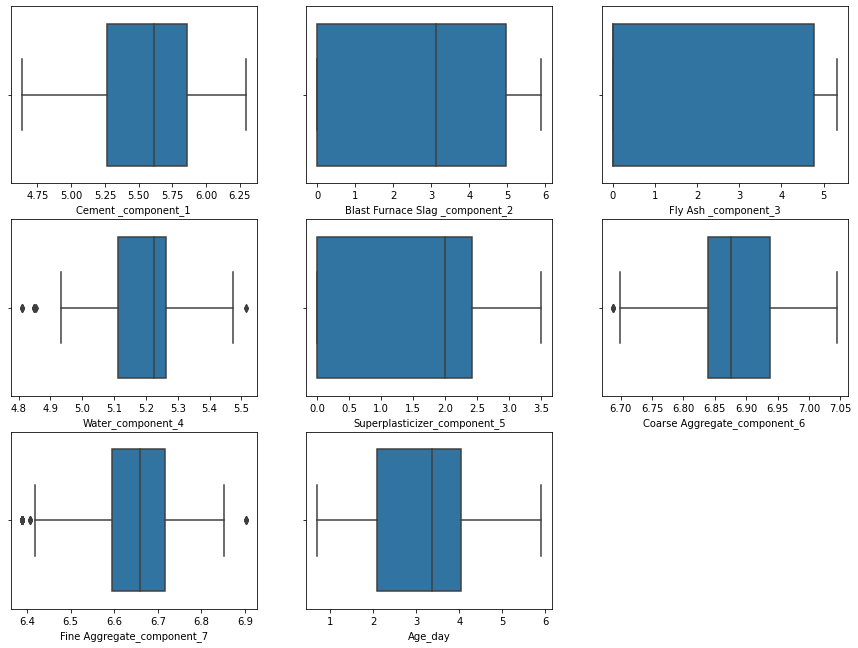

In [14]:
plt.figure(figsize=(15,15), facecolor = 'white')
plotnumber = 1

for column in x.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(x[column])
    plt.xlabel(column, fontsize=10)
    plotnumber +=1
    
plt.show()

C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhi

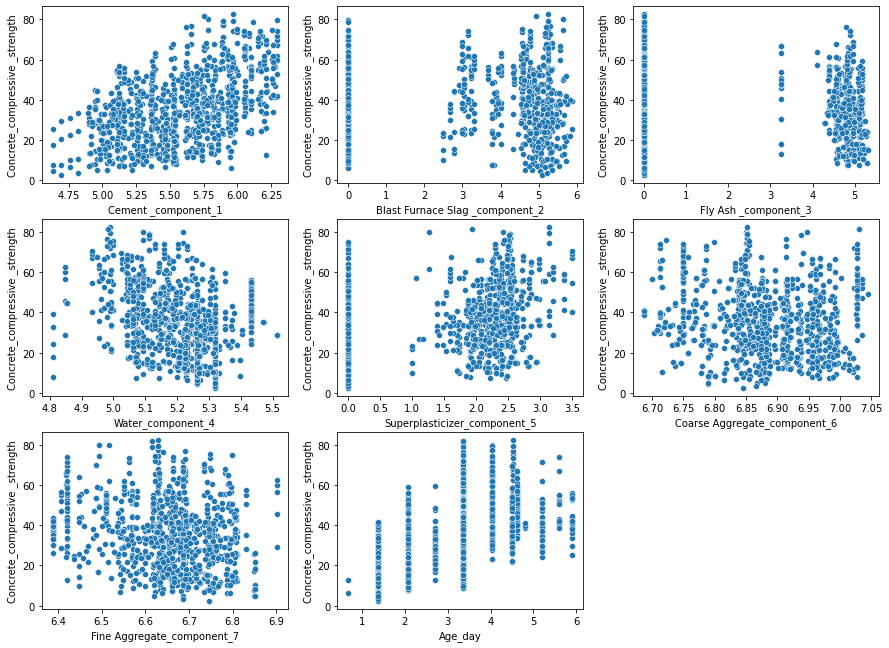

In [15]:
plt.figure(figsize=(15,15), facecolor = 'white')
plotnumber = 1

for column in x.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.scatterplot(x[column],y)
    plt.xlabel(column, fontsize=10)
    plotnumber +=1
    
plt.show()

<AxesSubplot:>

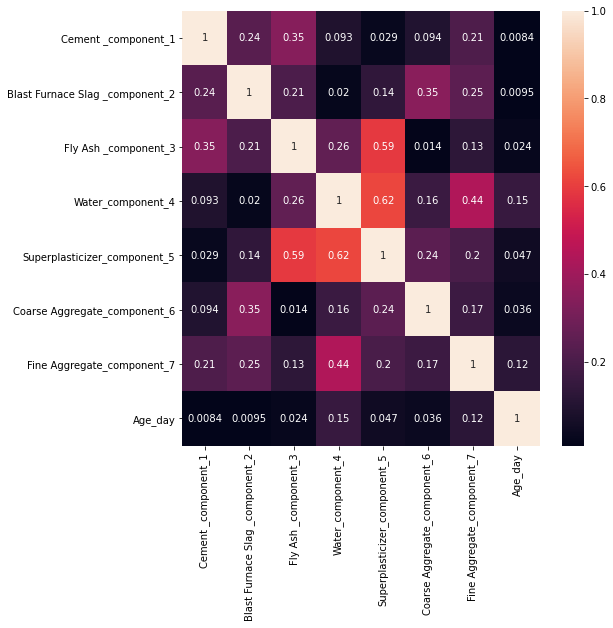

In [16]:
plt.figure(figsize=(8,8))
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(x.corr().abs(), annot=True)

In [18]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

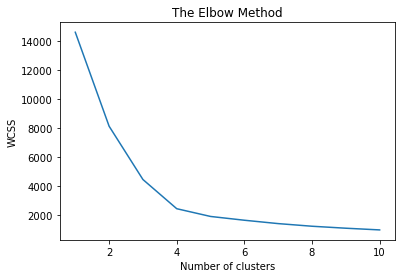

In [19]:
plt.plot(range(1,11),wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [20]:
knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [21]:
knee

In [22]:
number_of_cluster = 4

In [23]:
Kmeans2 = KMeans(n_clusters = number_of_cluster, init='k-means++')


In [24]:
x['clusters'] = Kmeans2.fit_predict(x)

In [25]:
x

,Cement _component_1,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,clusters
0,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,3.367296,2
1,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,3.367296,2
2,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.602119,0
3,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.902633,0
4,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878,0
...,...,...,...,...,...,...,...,...,...
1025,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296,1
1026,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,3.367296,3
1027,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296,1
1028,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,3.367296,0


In [26]:
clusters = x['clusters'].unique()
clusters

array([2, 0, 3, 1])

In [27]:
x['Concrete_strength'] = y
x

,Cement _component_1,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,clusters,Concrete_strength
0,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,3.367296,2,79.99
1,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,3.367296,2,61.89
2,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.602119,0,40.27
3,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.902633,0,41.05
4,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878,0,44.30
...,...,...,...,...,...,...,...,...,...,...
1025,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296,1,44.28
1026,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,3.367296,3,31.18
1027,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296,1,23.70
1028,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,3.367296,0,32.77


In [28]:
####for cluster 1

In [29]:
#cluster_data_1 = x[x['clusters']==1] 
#cluster_feature_data_1 = cluster_data_1.drop(['Concrete_strength','clusters'],axis=1)
#cluster_label_data_1 = cluster_data_1['Concrete_strength']

In [30]:
#x_train1, x_test1, y_train1, y_test1 = train_test_split(cluster_feature_data_1, cluster_label_data_1, test_size=1 / 3, random_state=36)

In [31]:
#models used
# 1. Linear Regression
# 2. Random Forest Regressor

#hyperparameter_tuning
# grid search cv

In [32]:
#Lin_reg = LinearRegression()
#Random_forest = RandomForestRegressor()

In [34]:
#parameters_lin_reg = {'fit_intercept': [True, False],
    #                  'normalize': [True, False],
    #                  'copy_X': [True, False]}

In [35]:
'''parameters_random_forest = {'n_estimators' : [30,40,50],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'min_samples_split': [2,4,8],
                            'bootstrap': [True, False]
    }'''

"parameters_random_forest = {'n_estimators' : [30,40,50],\n                            'max_features' : ['auto', 'sqrt', 'log2'],\n                            'min_samples_split': [2,4,8],\n                            'bootstrap': [True, False]\n    }"

In [36]:
#lin_reg_grid = GridSearchCV(Lin_reg, parameters_lin_reg, verbose=3, cv=5)

In [37]:
#lin_reg_grid.fit(x_train1,y_train1)

In [38]:
#param_fit_intercept = lin_reg_grid.best_params_['fit_intercept']
#param_normalize = lin_reg_grid.best_params_['normalize']
#param_copy_X = lin_reg_grid.best_params_['copy_X']

In [39]:
#model_lin_reg = LinearRegression(fit_intercept = param_fit_intercept, normalize = param_normalize, copy_X = param_copy_X)

In [40]:
#model_lin_reg.fit(x_train1,y_train1)

In [41]:
#x_test1 = scalar.transform(x_test1)

In [42]:
#prediction_lin_reg = model_lin_reg.predict(x_test1)

In [43]:
#model_lin_reg_score = r2_score(y_test1, prediction_lin_reg)
#model_lin_reg_score

In [44]:
#random_forest_grid = GridSearchCV(Random_forest, parameters_random_forest, verbose=3, cv=5)

In [45]:
#random_forest_grid.fit(x_train1, y_train1)

In [46]:
#param_n_estimators = random_forest_grid.best_params_['n_estimators']
#param_max_features = random_forest_grid.best_params_['max_features']
#param_min_samples_split = random_forest_grid.best_params_['min_samples_split']
#param_bootstrap = random_forest_grid.best_params_['bootstrap']

In [48]:
#model_random_forest = RandomForestRegressor(n_estimators = param_n_estimators, 
  #                                         max_features = param_max_features,
   #                                        min_samples_split = param_min_samples_split,
    #                                       bootstrap = param_bootstrap)

In [50]:
#model_random_forest.fit(x_train1, y_train1)

In [51]:
#prediction_random_forest = model_random_forest.predict(x_test1)

In [52]:
#model_random_forest_score = r2_score(y_test1, prediction_random_forest)
#model_random_forest_score

In [53]:
error_linear_reg = []
error_random_forest=[]

In [55]:
for cluster in clusters:
    cluster_data = x[x['clusters']==cluster] 
    cluster_feature_data = cluster_data.drop(['Concrete_strength','clusters'],axis=1)
    cluster_label_data = cluster_data['Concrete_strength']
    
    x_train, x_test, y_train, y_test = train_test_split(cluster_feature_data, cluster_label_data, test_size=1 / 3, random_state=36)
    
    Lin_reg = LinearRegression()
    Random_forest = RandomForestRegressor()
    
    
    parameters_lin_reg = {'fit_intercept': [True, False],
                      'normalize': [True, False],
                      'copy_X': [True, False]}
    
    parameters_random_forest = {'n_estimators' : [30,40,50],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'min_samples_split': [2,4,8],
                            'bootstrap': [True, False]
    }
    
    lin_reg_grid = GridSearchCV(Lin_reg, parameters_lin_reg, verbose=3, cv=5)
    lin_reg_grid.fit(x_train,y_train)
    
    param_fit_intercept = lin_reg_grid.best_params_['fit_intercept']
    param_normalize = lin_reg_grid.best_params_['normalize']
    param_copy_X = lin_reg_grid.best_params_['copy_X']
    
    model_lin_reg = LinearRegression(fit_intercept = param_fit_intercept, normalize = param_normalize, copy_X = param_copy_X)
    model_lin_reg.fit(x_train,y_train)
    
    prediction_lin_reg = model_lin_reg.predict(x_test)
    model_lin_reg_score = r2_score(y_test, prediction_lin_reg)
    
    error_linear_reg.append(model_lin_reg_score)
    
    random_forest_grid = GridSearchCV(Random_forest, parameters_random_forest, verbose=3, cv=5)
    random_forest_grid.fit(x_train, y_train)
    
    param_n_estimators = random_forest_grid.best_params_['n_estimators']
    param_max_features = random_forest_grid.best_params_['max_features']
    param_min_samples_split = random_forest_grid.best_params_['min_samples_split']
    param_bootstrap = random_forest_grid.best_params_['bootstrap']
    
    model_random_forest = RandomForestRegressor(n_estimators = param_n_estimators, 
                                           max_features = param_max_features,
                                           min_samples_split = param_min_samples_split,
                                           bootstrap = param_bootstrap)
    
    model_random_forest.fit(x_train, y_train)
    
    
    prediction_random_forest = model_random_forest.predict(x_test)
    model_random_forest_score = r2_score(y_test, prediction_random_forest)
    
    error_random_forest.append(model_random_forest_score)
    
    if model_random_forest_score > model_lin_reg_score:
        
        filename = "Model_" + str(cluster) + '.pickle'
        pickle.dump(model_random_forest, open(filename, 'wb'))
        print('Random_forest')
        
    else:
        
        filename = "Model_" + str(cluster) + '.pickle'
        pickle.dump(model_lin_reg, open(filename, 'wb'))
        print('linear_regression')
    
    

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.774, total=   0.5s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.899, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.862, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.804, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.925, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.774, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.899, total=   0.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s



[CV] copy_X=False, fit_intercept=True, normalize=False ...............
[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.899, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=False ...............
[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.862, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=False ...............
[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.804, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=False ...............
[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.925, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.773, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.891, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ..............

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.875, total=   0.3s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.936, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.922, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.740, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.913, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, score=0.857, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, score=0.935, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, score=0.923, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, s

[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.886, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.891, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.876, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.774, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.908, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=50, s

[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.901, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.911, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.722, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.928, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=50, score=0.880, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=50, s

[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.731, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.902, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50, score=0.881, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50, score=0.842, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50, score=0.897, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estim

[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.779, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.911, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50, score=0.923, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50, score=0.874, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50, score=0.846, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estim

[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50, score=0.904, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50, score=0.879, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50, score=0.889, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50, score=0.751, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50, score=0.911, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=False, max_features=log2, min_samples_split=4, n_estim

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Random_forest
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.790, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.738, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.912, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.822, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.855, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.790, total=   0.0s
[CV] co

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.738, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=False ...............
[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.912, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=False ...............
[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.822, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=False ...............
[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.855, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.813, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.723, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.905, 

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.862, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.925, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.945, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.871, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.849, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, score=0.857, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, score=0.913, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[

[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=30, score=0.904, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=30, score=0.946, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=30, score=0.852, total=   0.0s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=30, score=0.849, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.851, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, s

[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=30, score=0.839, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=30, score=0.871, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=30, score=0.820, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=30, score=0.773, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.824, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estim

[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30, score=0.896, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30, score=0.835, total=   0.0s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.839, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.924, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.921, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estim

[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=30, score=0.884, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40, score=0.851, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40, score=0.909, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40, score=0.951, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40, score=0.904, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estim

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   24.1s finished


Random_forest
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.878, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.882, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.933, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.848, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.925, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.878, total=   0.0s
[CV] co

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.930, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.822, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.894, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=False ..............
[CV]  copy_X=False, fit_intercept=False, normalize=False, score=0.868, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=False ..............
[CV]  copy_X=False, fit_intercept=False, normalize=False, score=0.898, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=False ..............
[CV]  copy_X=False, fit_intercept=False, normalize=False, score=0.930, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=False ..............
[CV]  copy_X=False, fit_intercept=False, normalize=False, score=0.8

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.857, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.911, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.751, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.752, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, score=0.917, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, score=0.862, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, score=0.900, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, score=0.739, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, score=0.797, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50, s

[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.887, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.739, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.775, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.622, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.691, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=50, s

[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.879, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.813, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.830, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.700, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.750, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=50, s

[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.693, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.681, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.812, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.533, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.759, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estim

[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.822, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.689, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.689, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50, score=0.910, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50, score=0.784, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estim

[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40, score=0.880, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40, score=0.721, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40, score=0.750, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50, score=0.901, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50, score=0.821, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estim

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   21.7s finished


linear_regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.697, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.801, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.670, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.687, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.720, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.697, total=   0.0s
[CV

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.720, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.702, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.828, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.654, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.662, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=0.690, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=False ..............
[CV]  copy_X=False, fit_intercept=False, normalize=False, score=0.702,

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.802, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.603, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.754, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30, score=0.768, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, score=0.604, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=40, s

[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30, score=0.578, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30, score=0.696, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30, score=0.591, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.597, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.773, total=   0.1s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=40, s

[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=30, score=0.795, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=30, score=0.679, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.656, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.815, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, score=0.652, total=   0.1s
[CV] bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=True, max_features=log2, min_samples_split=2, n_estimators=40, s

[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=30, score=0.498, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.385, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.615, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.555, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40, score=0.674, total=   0.1s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estim

[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.742, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.681, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.810, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=40, score=0.563, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50, score=0.710, total=   0.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=2, n_estim

[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40, score=0.652, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40, score=0.783, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=40, score=0.710, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50, score=0.722, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50, score=0.809, total=   0.1s
[CV] bootstrap=False, max_features=log2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=2, n_estim

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   23.4s finished


Random_forest


In [58]:
"Random_Forest_" + str(clusters[0]) + '.pickle'

'Random_Forest_2.pickle'

In [59]:
filename = "kmeans_clustering.pickle"
pickle.dump(Kmeans2, open(filename, 'wb'))


In [56]:
error_linear_reg

[0.8124027452249347,
 0.8307572358050374,
 0.8924591997329681,
 0.7479070510068794]

In [57]:
error_random_forest

[0.8808723602899367, 0.9290025251035373, 0.864835676573709, 0.880364105347897]

In [70]:
l1 = [6.293419, 0.000000, 0.000000, 5.093750, 1.252763, 6.947937, 6.517671,3.367296]

In [68]:
value = Kmeans2.predict([[6.293419, 0.000000, 0.000000, 5.093750, 1.252763, 6.947937, 6.517671,3.367296]])

## 